In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df=pd.read_csv('height_weight_large.csv')

In [9]:
df.head()

,Weight,Height
0,50,151
1,52,153
2,54,154
3,55,158
4,56,157


Text(0, 0.5, 'Height')

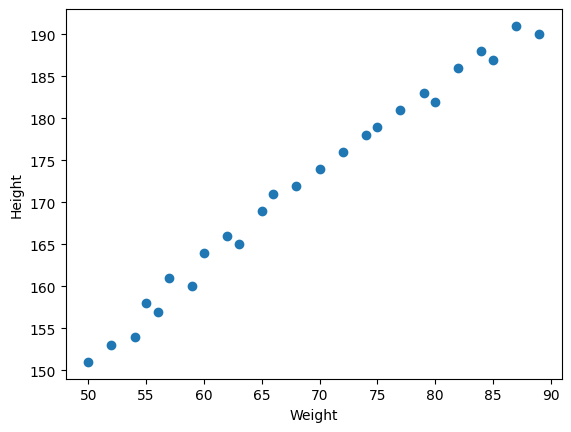

In [11]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


In [12]:
##correlation
df.corr()

,Weight,Height
Weight,1.000000,0.994089
Height,0.994089,1.000000


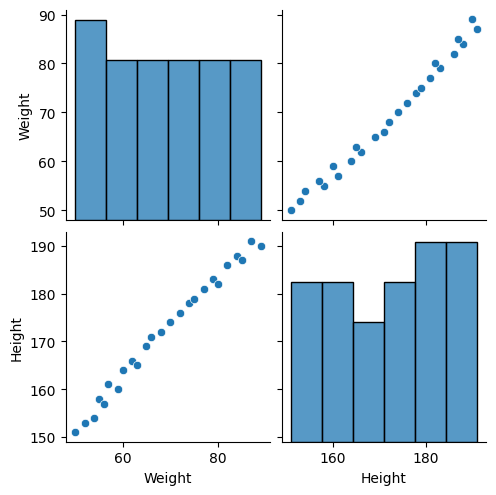

In [13]:
##seaborn for visualisation
import seaborn as sns
sns.pairplot(df)

In [19]:
##independent & dependent features
X=df[['Weight']]
X.head()
y=df['Height'] ##this variable cvan be in series or 1_D array


In [18]:
X_series=df['Weight']
np.array(X_series).shape

(25,)

In [23]:
##train- test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
X_train.shape


(18, 1)

In [26]:
##standardization
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [31]:
X_test=scaler.fit_transform(X_test)

In [33]:
X_test

array([[-0.52060193],
       [ 0.69413591],
       [-1.6418984 ],
       [ 1.81543238],
       [-0.14683644],
       [-0.42716056],
       [ 0.22692905]])

In [34]:
##apply simple linear regression
from sklearn.linear_model import LinearRegression

In [40]:
regression=LinearRegression(n_jobs=-1)

In [41]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [45]:
print("Coeff or slope:",regression.coef_)
print("intercept:",regression.intercept_)

Coeff or slope: [12.39382609]
intercept: 172.16666666666666


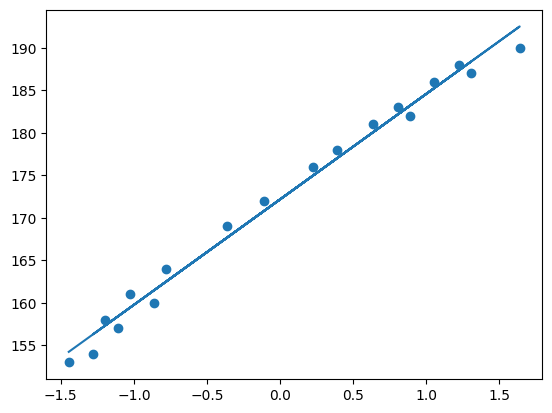

In [49]:
##plot training dataset plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

prediction of test data
predicted height output=intercept+coef(weights)
y_pred_test=172.16+12.39(X_test)

In [50]:
##prediction for test data
y_pred=regression.predict(X_test)

In [52]:
##performance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3.1740775018644576
1.4348900411196357
1.7815940900958493


In [54]:
from sklearn.metrics import r2_score

In [55]:
score=r2_score(y_test,y_pred)
print(score)

0.9762114105855982


In [57]:
##ols technique
import statsmodels.api as sm

In [58]:
model=sm.OLS(y_train,X_train).fit()

In [60]:
prediction=model.predict(X_test)
print (prediction)

[ -6.45224981   8.60299975 -20.34940325  22.50015319  -1.81986533
  -5.29415369   2.81251915]


In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.053
Method:                 Least Squares   F-statistic:                            0.08809
Date:                Thu, 02 Oct 2025   Prob (F-statistic):                       0.770
Time:                        13:35:12   Log-Likelihood:                         -118.21
No. Observations:                  18   AIC:                                      238.4
Df Residuals:                      17   BIC:                                      239.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [66]:
##prectrion for new data
regression.predict(scaler.fit_transform([[72]]))

array([172.16666667])